# part1-2 쿠버네티스

## 1. 쿠버네티스 컨셉 
### 1) 선언형 인터페이스와 Desired State
- 명령형 인터페이스는 목적을 달성하기 위한 수단을 하나하나 지시해야함
    - ex) 에어컨의 냉매는 어떤 걸 쓰고 얼마나 압축한 다음 어떻게 순환시켜서.. 20도가 되면 유지하라
- 선언형 인터페이스는 바라는 목적만 이야기하면됨
    - ex) 내 방 온도가 20도가 되었으면 좋겠어

### 2) 쿠버네티스 클러스터 구조 : Master Node & Worker Node
- Master와 Worker Node가 분리되어 있다.
- Control plane : 여러 worker node 관리하며 사용자 요청에 맞는 worker node를 스케줄링하여 해당 node도 요청 전달
- API Server : 사용자의 요청을 받는 곳
- etcd : 사용자의 Desired State를 key value형태로 저장하는 데이터베이스
- kublet : Control plane으로부터 명령을 받고 worker node Control plane(cube API server)에게 상태를 전달하는 역할을 함


# 1. YAML 이란?

- 데이터 직렬화에 쓰이는 포맷/양식 중 하나
    - 데이터 직렬화란?
        - 서비스간에 Data 를 전송할 때 쓰이는 포맷으로 변환하는 작업
            - ex) 쿠버네티스 마스터에게 요청을 보낼 때 사용하는 정해진 형식임
    - 다른 데이터 직렬화 포맷
        - XML, JSON
- 파일 포맷
    - `.yaml`, `.yml`

 # 2. YAML 특징

## 가독성
- YAML 은 **사람이 읽기 쉽도록** 디자인
    - YAML 포맷   

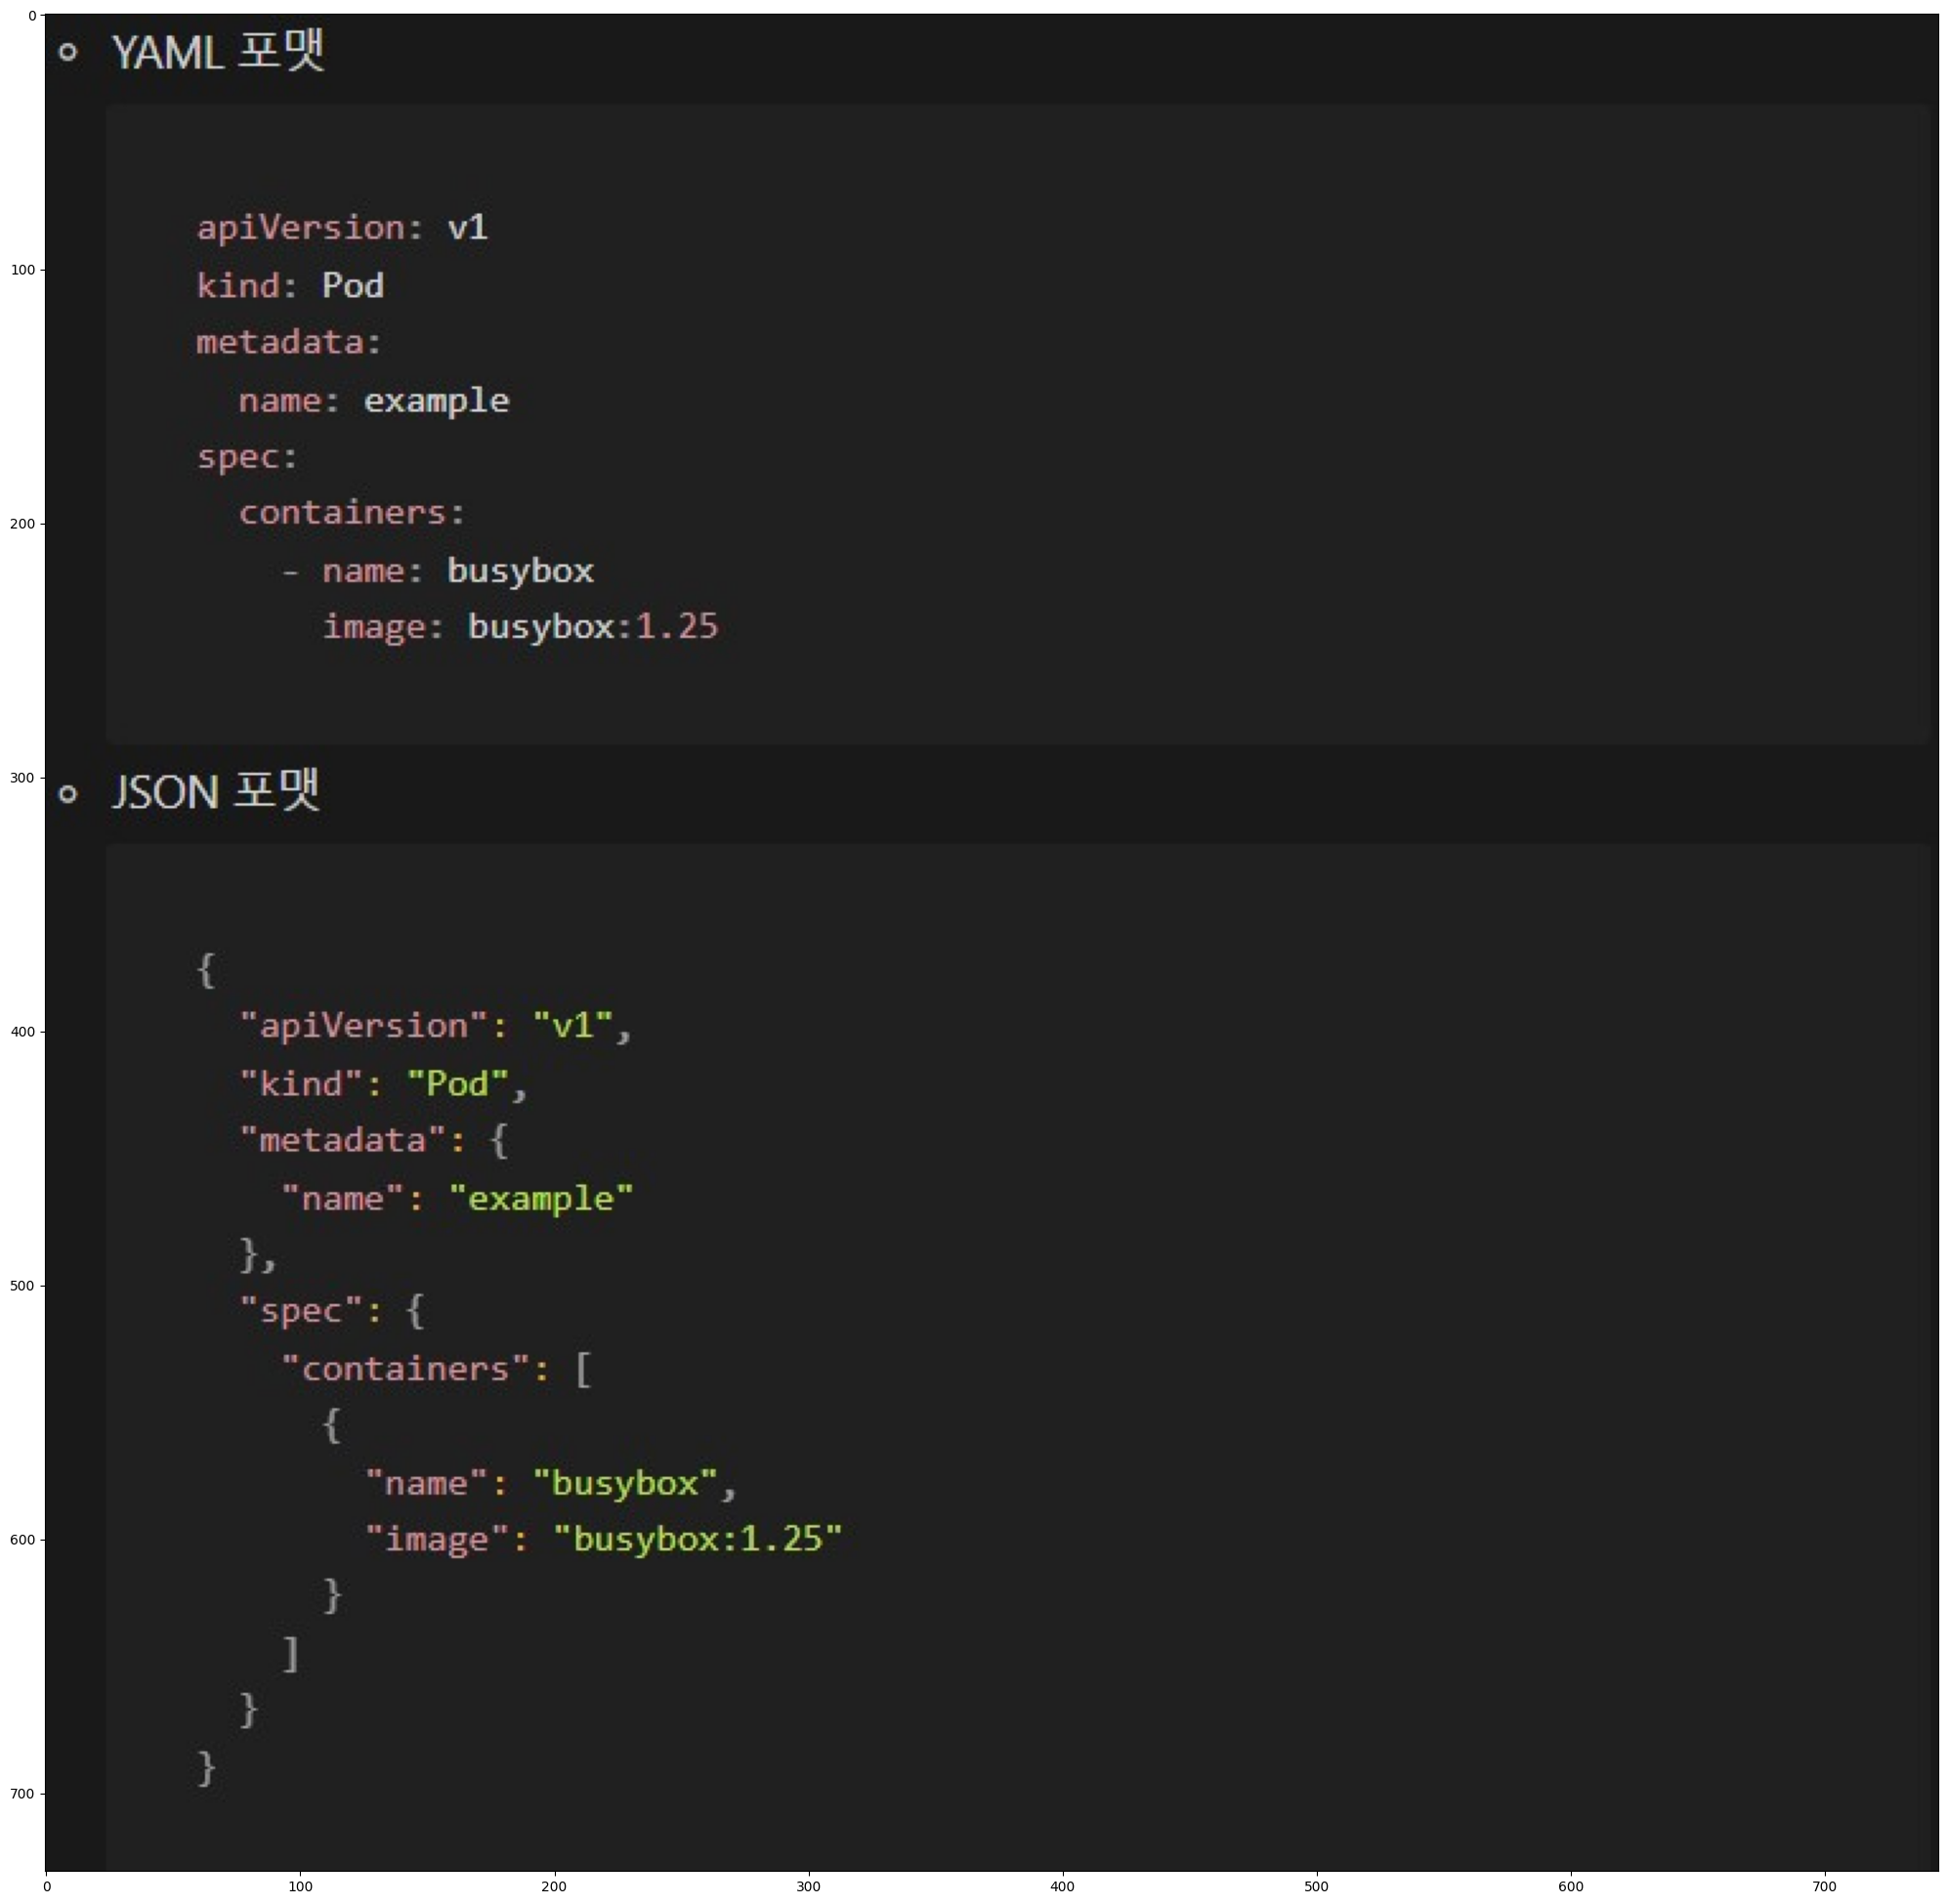

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

def display(start, end):
    for i in range(end+1):
        if i > start-1:
            GAP = cv2.imread(f'yaml{i}.jpg')
            GAP = cv2.cvtColor(GAP, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(25,25))
            plt.imshow(GAP)
            plt.show()

display(start=1, end=1)

### Strict-Validation
 Widely-use
- kubernetes manifests 명세
- docker compose 명세
- ansible playbook 명세
- github action workflow 명세

### Strict-Validation
- 줄 바꿈
- 들여쓰기
    - `Tab` vs `Space`

### 3. 문법
#### 1) Key-Value
- Recursive 한 key-value pair 의 집합

#### 2) 주석
- `#` 를 줄의 맨 앞에 작성하면 주석 처리됩니다.

#### 3) 자료형
#### string
    - 일반적인 문자열은 그냥 작성해도 되고, 따옴표로 감싸도 됩니다.
        - example: this is 1st string
        - example: "this is 1st string"

- 1. **반드시 따옴표로 감싸주어야 하는 경우**
    - 1) 숫자를 문자열 타입으로 지정하고 싶은 경우
        - example: 123
        - example: "123"

- 2. **y, yes, true 등의 YAML 예약어와 겹치는 경우**
        - example: "y"

- 3. **:, {, }, ,, #, *, =, \n 등의 특수 문자를 포함한 경우**
        - example: "a : b"
        - example: "a#bc*"
#### integer
- 1. integer type
        - example: 123

- 2. hexadecimal type: 0x 로 시작
        - example: 0x1fff

#### float
- 1. float type
        - example: 99.9

- 2. exponential type
        - example: 1.23e+03 # 1.23 x 10^3 = 1230

#### boolean
- 1. True
        - example: true
        - example: yes
        - example: on

- 2. False
        - example: false
        - example: no
        - example: off

### 4) List
- 1.  - 를 사용하여 list 를 명시할 수 있습니다.
examples:
  - ex_one: 1
  - ex_two: 2

- 2.  [ ] 로 입력해도 됩니다.
        - examples: ["1", "2", "3"]

- 3.  list 의 원소는 어떤 자료형이든 가능합니다.

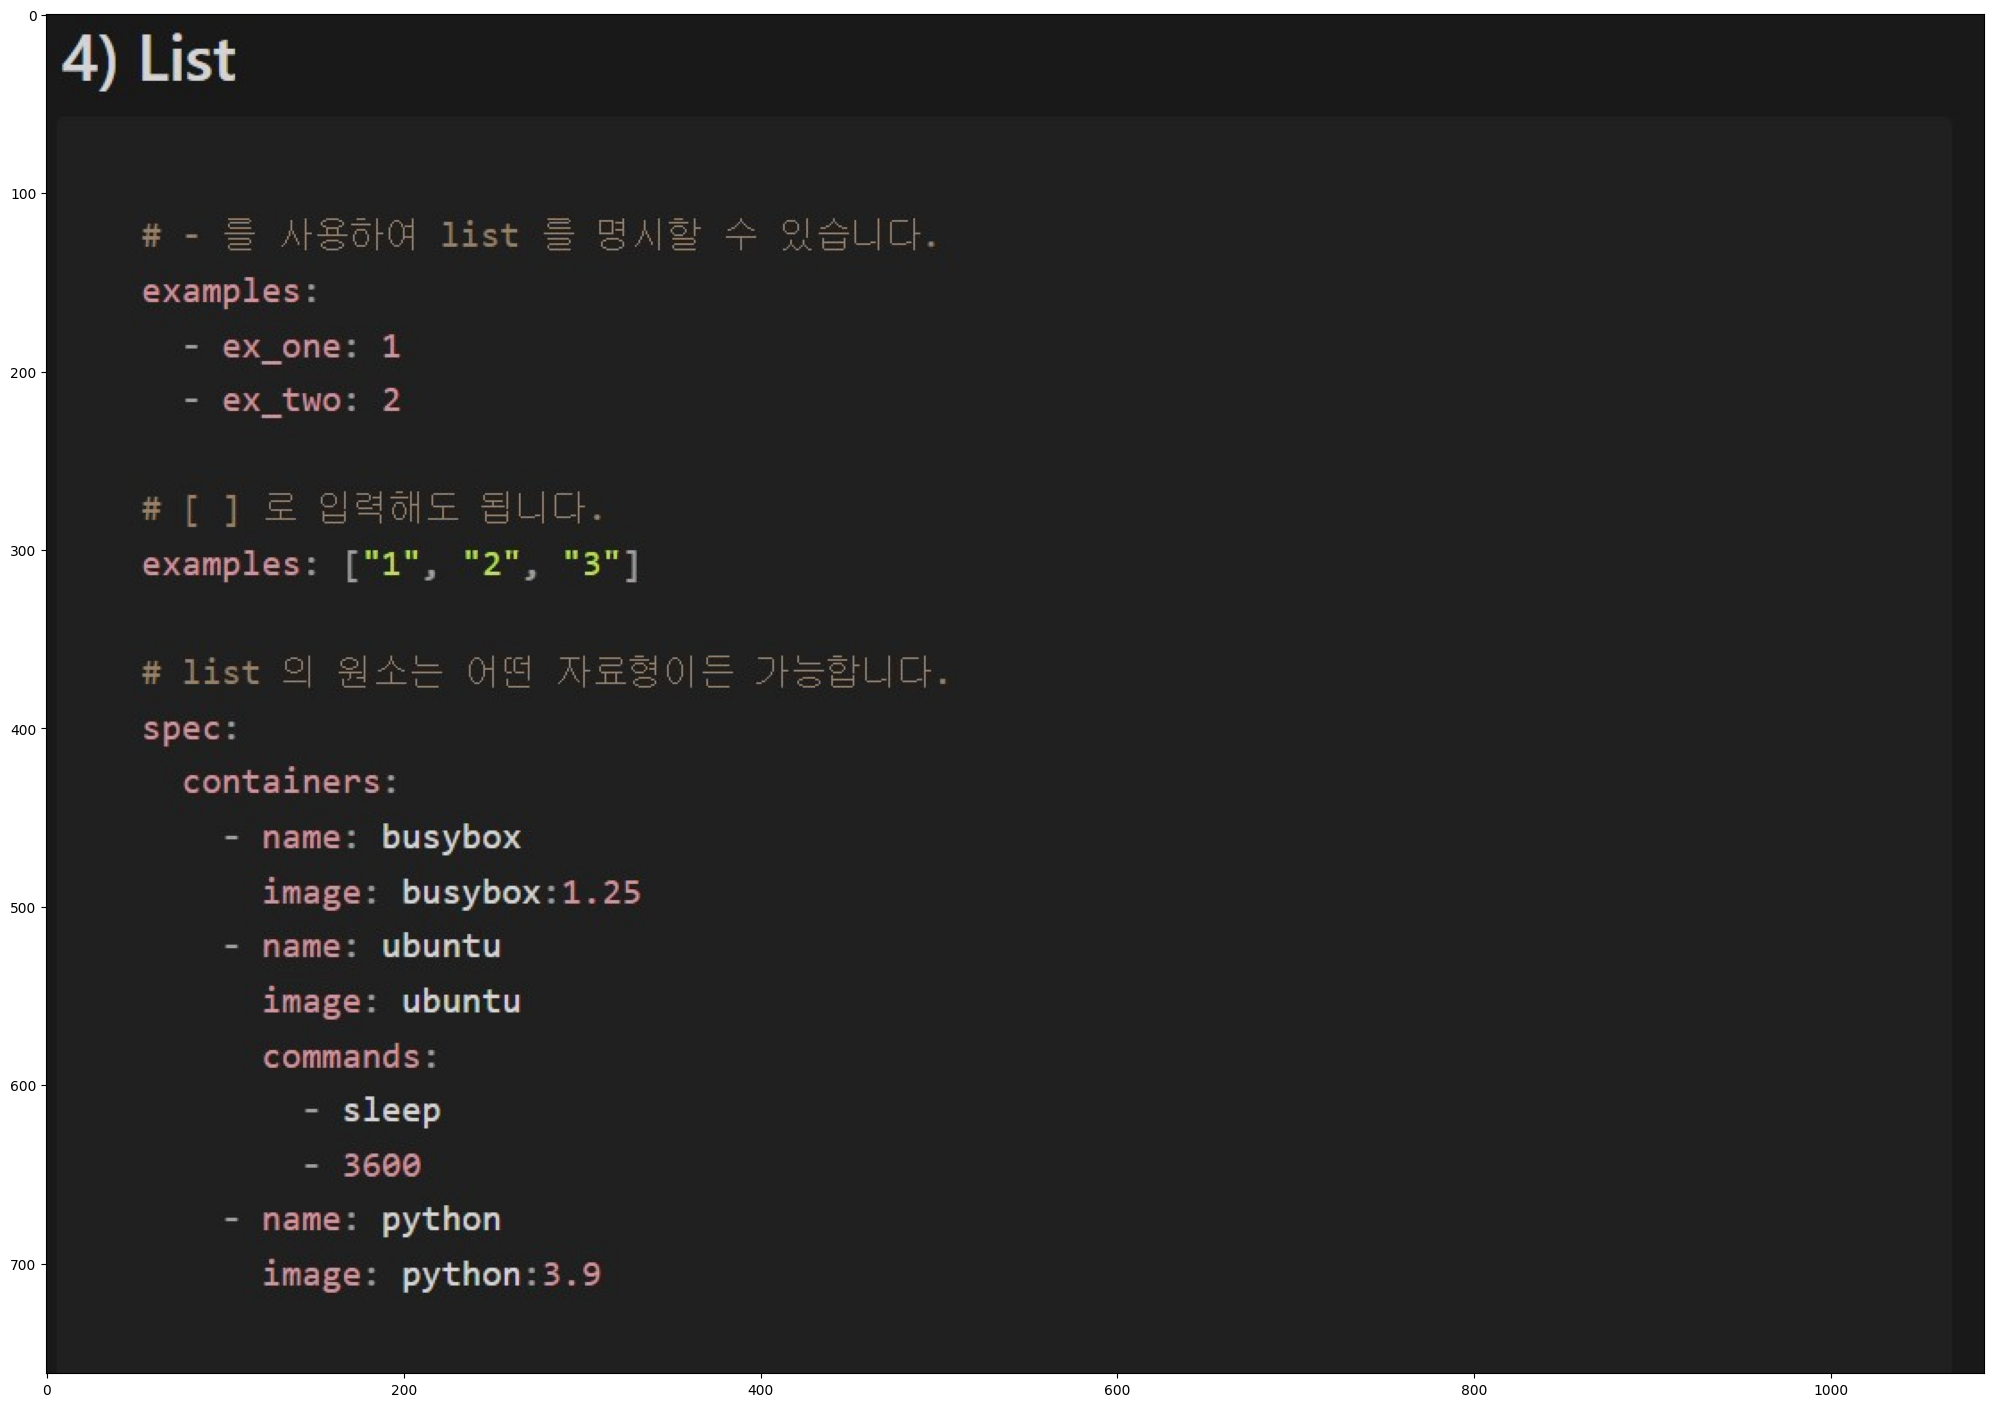

In [2]:
display(start=2, end=2)

### 5) Multi-line strings
### `|`

- 중간에 위치한 **빈 줄**을 `\n` 으로 처리하며, **문자열의 맨 마지막**에 `\n` 을 붙입니다.

In [ ]:
example: |
  Hello
  Fast
  Campus.
# "Hello\nFast\nCampus.\n" 으로 처리

### `>`

- 중간에 위치한 **빈 줄**을 제외하고, **문자열의 맨 마지막**에 `\n` 을 붙입니다.

In [ ]:
example: >
  Hello
  Fast
  Campus.
# "Hello Fast Campus.\n" 으로 처리

#### `|-` , `>-`

- 각각 `|`, `>` 와 동일하되, **문자열의 맨 마지막**에 `\n` 이 추가되지 않습니다.

### 6) Multi-document yaml

- `---` 라는 구분선을 통해 하나의 yaml 파일에 여러 개의 yaml document 를 작성 가능

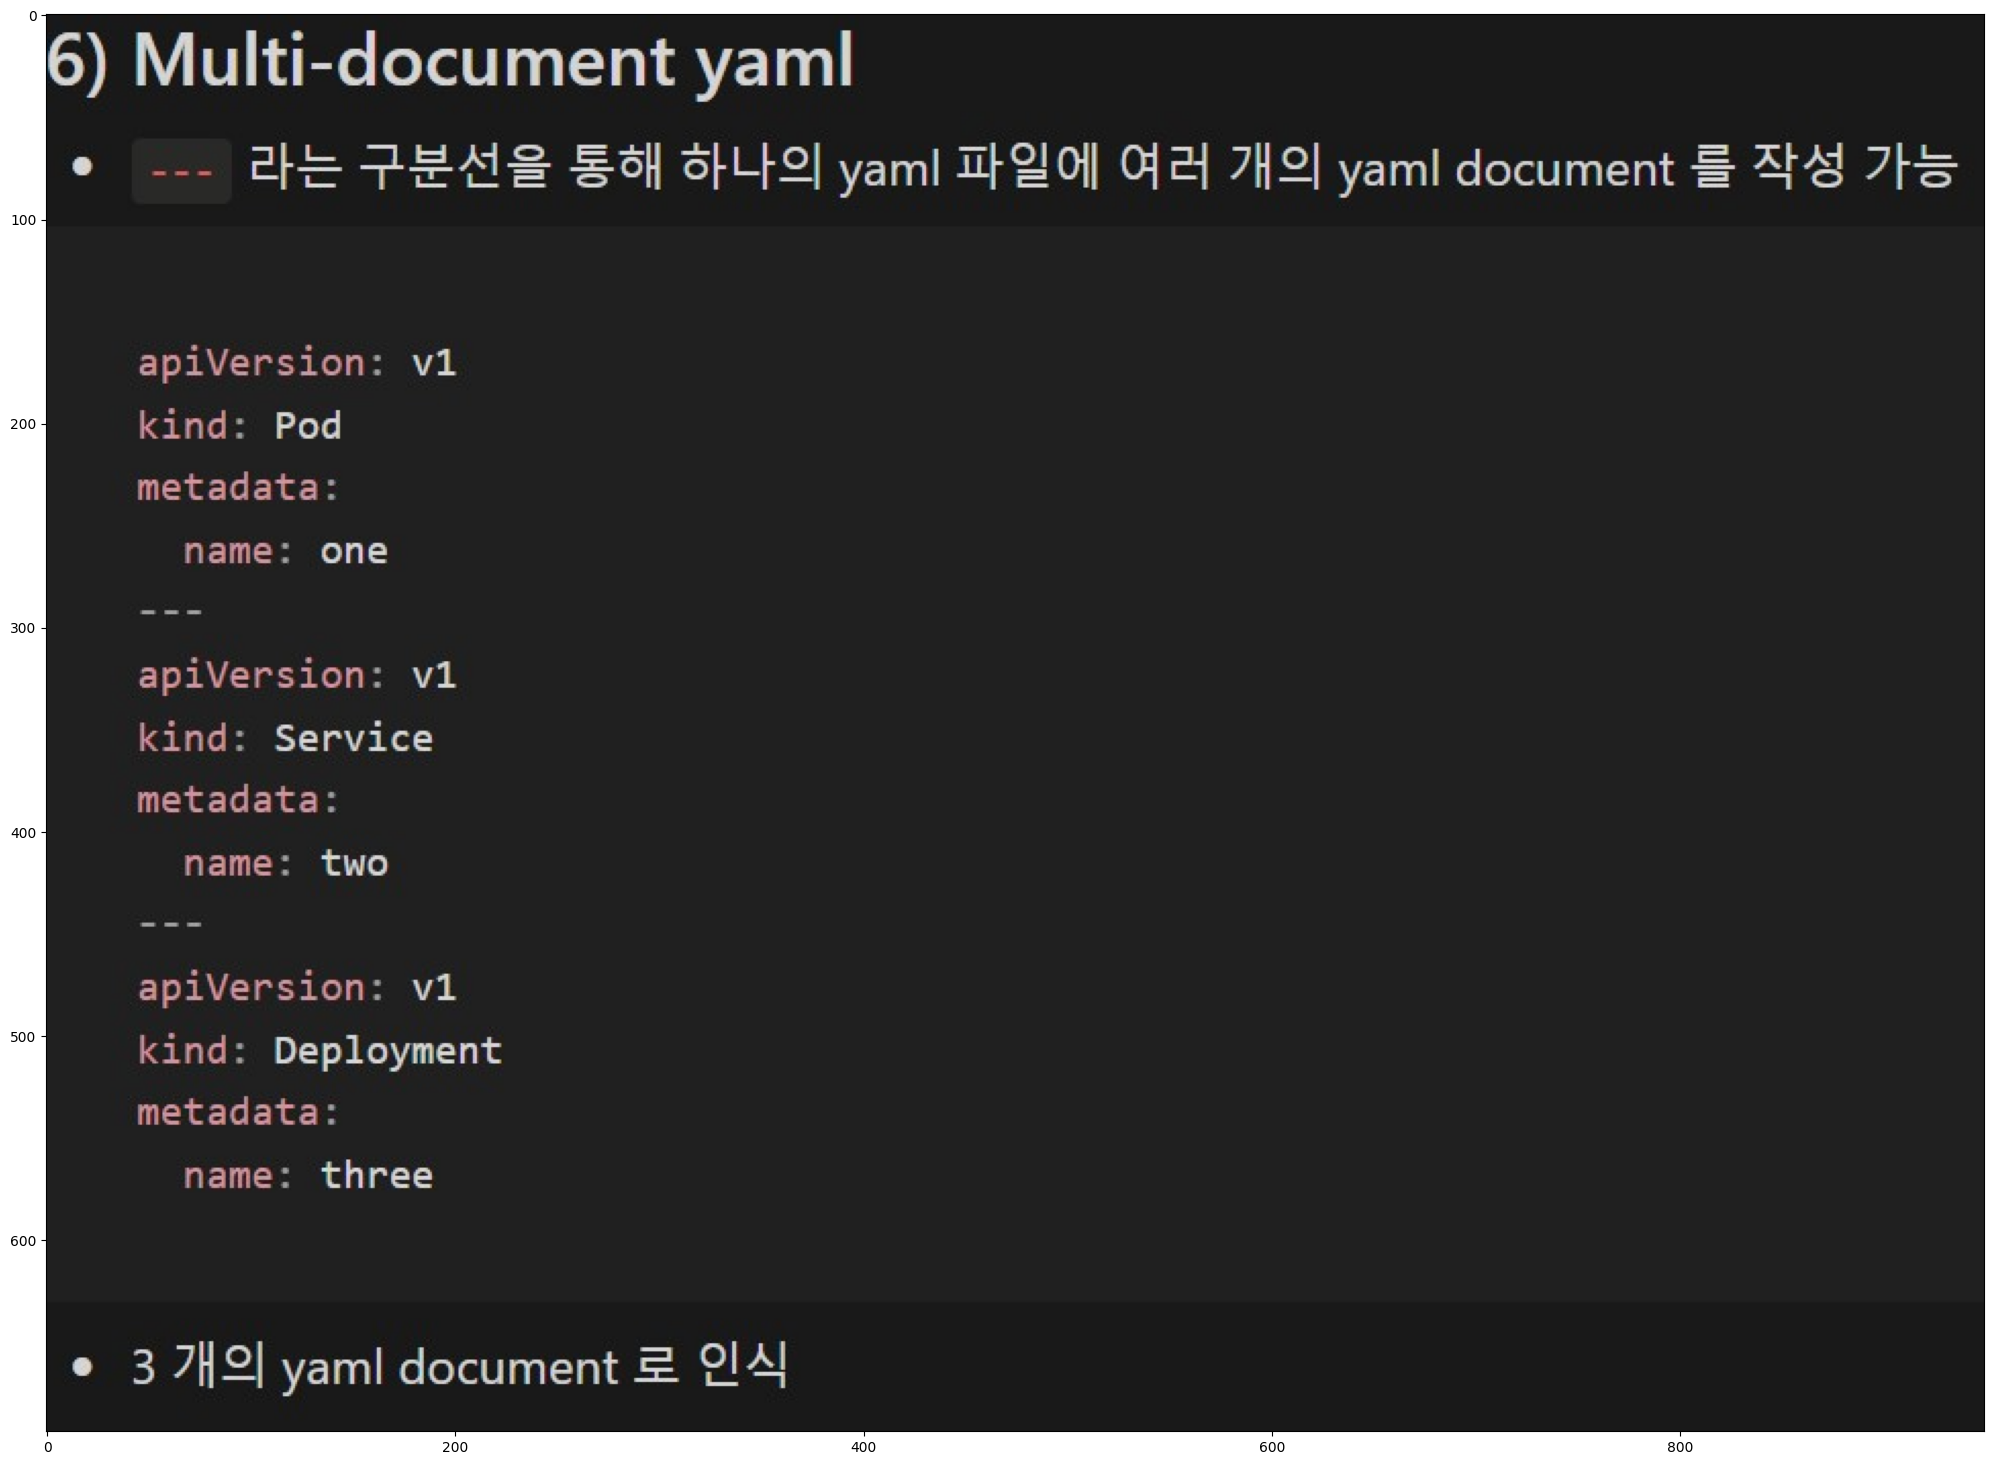

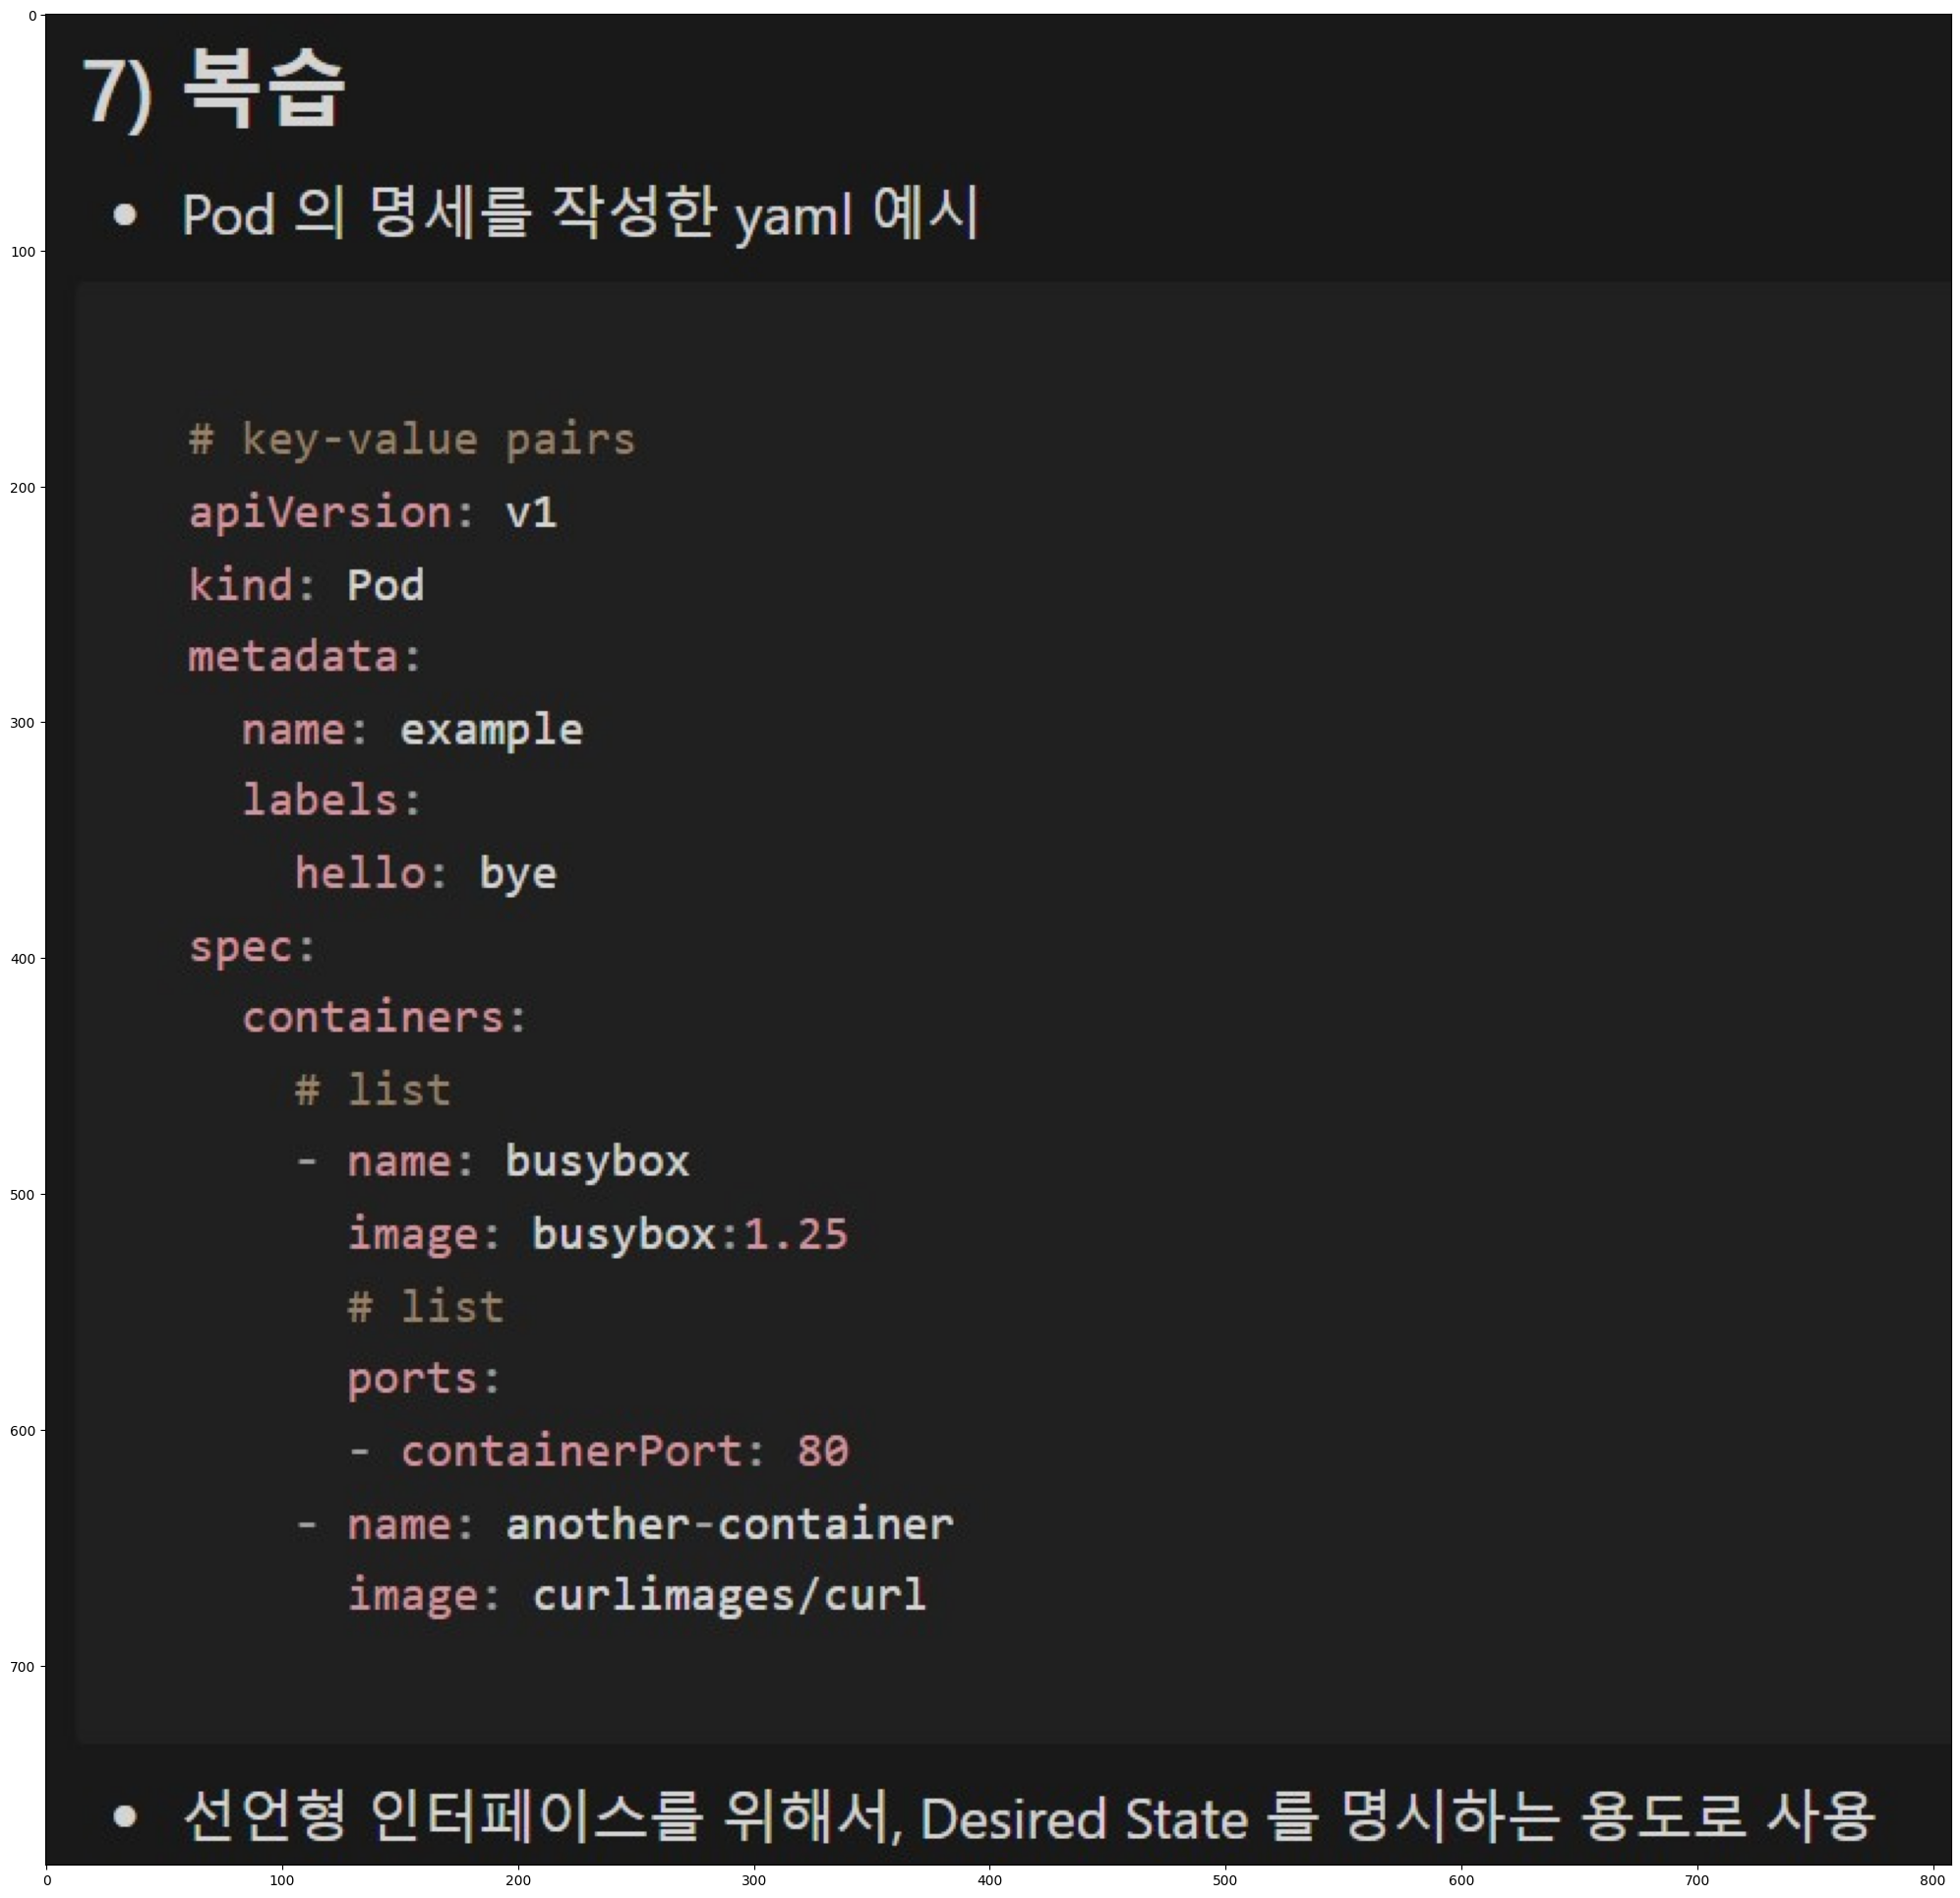

In [3]:
display(start=3, end=4)

# 쿠버네티스 실습 2 - minikube 설치
# 1. Prerequisite

- References
    - minikube
        - https://minikube.sigs.k8s.io/docs/start/
    - kubectl
        - https://kubernetes.io/ko/docs/tasks/tools/install-kubectl-linux/
- 최소 사양
    - **CPU : 2 이상**
        - 원활한 실습을 위해서는 6 이상을 추천
    - **Memory : 2GB 이상**
        - 원활한 실습을 위해서는 12 GB 이상을 추천
    - **Disk : 20 GB 이상**
        - 원활한 실습을 위해서는 100 GB 이상을 추천
    - 가상화 tool : **Docker**, Hyperkit, Hyper-V, ...

### VM 스펙 업그레이드 필요

- CPU : multicore

# 2. Let's Install Minikube

- minikube 의 최신 버전 (v1.22.0) 바이너리를 다운받고, 실행할 수 있도록 변경합니다.
    - 이하의 모든 커맨드는 amd 기반의 CPU 를 기준으로 합니다.
    - arm 기반의 CPU 는 공식 문서를 확인해주시기 바랍니다.



In [4]:
# source /mnt/d/ubu/mmlab/bin/activate
# curl -LO https://storage.googleapis.com/minikube/releases/v1.22.0/minikube-linux-amd64

# sudo install minikube-linux-amd64 /usr/local/bin/minikube
# 정상 다운로드 확인
!minikube --help

minikube provisions and manages local Kubernetes clusters optimized for
development workflows.

Basic Commands:
  start          Starts a local Kubernetes cluster
  status         Gets the status of a local Kubernetes cluster
  stop           Stops a running local Kubernetes cluster
  delete         Deletes a local Kubernetes cluster
  dashboard      Access the Kubernetes dashboard running within the minikube
cluster
  pause          pause Kubernetes
  unpause        unpause Kubernetes

Images Commands:
  docker-env     Configure environment to use minikube's Docker daemon
  podman-env     Configure environment to use minikube's Podman service
  cache          Add, delete, or push a local image into minikube
  image          Manage images

Configuration and Management Commands:
  addons         Enable or disable a minikube addon
  config         Modify persistent configuration values
  profile        Get or list the current profiles (clusters)
  update-context Update kubeconfig in case

- minikube version 을 확인합니다.

In [5]:
# minikube version 을 확인합니다.
!minikube version

minikube version: v1.22.0
commit: a03fbcf166e6f74ef224d4a63be4277d017bb62e


# 3. Let's Install Kubectl

- kubectl 은 kubernetes cluster (server) 에 요청을 간편하게 보내기 위해서 널리 사용되는 client 툴입니다.
- kubectl 은 v1.22.1 로 다운로드 받겠습니다.
    - curl -LO https://dl.k8s.io/release/v1.22.1/bin/linux/amd64/kubectl

- kubectl 바이너리를 사용할 수 있도록 권한과 위치를 변경합니다.
    - sudo install -o root -g root -m 0755 kubectl /usr/local/bin/kubectl

- 정상적으로 설치되었는지 확인합니다.
    - kubectl --help
    - kubectl version
- `The connection to the server localhost:8080 was refused - did you specify the right host or port?` 메시지는 에러를 의미하는 것이 맞습니다.
- 하지만 `kubectl version` 은 client 의 버전과 kubernetes server 의 버전을 모두 출력하는 명령어이며, 현재 저희는 kubernetes server 를 생성하지 않았기 때문에 client 의 버전만 정상적으로 출력됩니다.

# 4. Minikube 시작하기

### minikube start

- minikube 를 docker driver 를 기반으로 하여 시작합니다.

In [7]:
!minikube start --driver=docker

😄  minikube v1.22.0 on Ubuntu 20.04 (amd64)
✨  Using the docker driver based on user configuration
🎉  minikube 1.30.1 is available! Download it: https://github.com/kubernetes/minikube/releases/tag/v1.30.1
💡  To disable this notice, run: 'minikube config set WantUpdateNotification false'

👍  Starting control plane node minikube in cluster minikube
🚜  Pulling base image ...
💾  Downloading Kubernetes v1.21.2 preload ...
    > preloaded-images-k8s-v11-v1...: 502.14 MiB / 502.14 MiB  100.00% 6.61 MiB
    > gcr.io/k8s-minikube/kicbase...: 361.08 MiB / 361.09 MiB  100.00% 4.04 MiB
🔥  Creating docker container (CPUs=2, Memory=8000MB) ...
🐳  Preparing Kubernetes v1.21.2 on Docker 20.10.7 ...
    ▪ Generating certificates and keys ...
    ▪ Booting up control plane ...
    ▪ Configuring RBAC rules ...
🔎  Verifying Kubernetes components...
    ▪ Using image gcr.io/k8s-minikube/storage-provisioner:v5
🌟  Enabled addons: default-storageclass, storage-provisioner
🏄  Done! kubectl is now configured to

### minikube status

- 정상적으로 생성되었는지 minikube 의 상태를 확인해봅니다.

In [8]:
!minikube status

minikube
type: Control Plane
host: Running
kubelet: Running
apiserver: Running
kubeconfig: Configured



### kubectl get pod -n kube-system

- kubectl 을 사용하여 minikube 내부의 default pod 들이 정상적으로 생성되었는지 확인해봅니다.

In [10]:
!kubectl get pod -n kube-system

NAME                               READY   STATUS    RESTARTS   AGE
coredns-558bd4d5db-r2bfp           1/1     Running   0          16m
etcd-minikube                      1/1     Running   0          16m
kube-apiserver-minikube            1/1     Running   0          16m
kube-controller-manager-minikube   1/1     Running   0          16m
kube-proxy-zdfrs                   1/1     Running   0          16m
kube-scheduler-minikube            1/1     Running   0          16m
storage-provisioner                1/1     Running   0          16m


# 5. Minikube 삭제하기

### minikube delete

- 다음 명령어로 간단하게 삭제할 수 있습니다.

In [11]:
!minikube delete

🔥  Deleting "minikube" in docker ...
🔥  Deleting container "minikube" ...
🔥  Removing /home/xy7648/.minikube/machines/minikube ...
💀  Removed all traces of the "minikube" cluster.
